### Convolutional Neural Network (CNN)

**AIM**: Build and train an image classifier to detect dogs and cats in images

### Objectives
- Data visualisation
- Data preprocessing and image augmentation
- BUild CNN Model
- Compile and train the model
- Add early stopping callback
- Save and load model
- Model evaluation
- Make prediction on new data

### Prerequisite
- Google colab or Jupyter notebook
- Dogs and Cats datasets
- TensorFlow2

### Check is TensorFlow, NumPy, Pandas and Matplotlib are installed

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, kauldron, tensorflow-text, tensorflow_decision_forests, tf_keras


In [2]:
# !pip show numpy

In [3]:
# !pip show pandas

In [4]:
!pip show matplotlib

Name: matplotlib
Version: 3.10.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") accessing and
 otherwise using matplotlib software in source or binary form and its
 associated documentation.

 2. Subject to the terms and conditions of this License Agreement, MDT
 hereby grants Licensee a nonexclusive, royalty-free, world-wide license
 to reproduce, analyze, test, perform and/or display publicly, prepare
 derivative works, distribute, and otherwise use matplotlib
 alone or in any derivative version, provided, however, that MDT's
 License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
 2012- Matplotlib Development Team; All Rights Reserved" are retained in
 matplotlib

In [5]:
import os
import sys
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

2025-12-24 13:06:28.385091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766581588.611431      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766581588.674726      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766581589.218868      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766581589.218915      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766581589.218918      55 computation_placer.cc:177] computation placer alr

In [6]:
# Set seed for reproducibility

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [7]:
# Check for GPU
!nvidia-smi

Wed Dec 24 13:06:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# Check if TensorFlow can detect any GPU
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    print(f"GPUs available: {len(gpus)}")

    for gpu in gpus:
        print(f"- {gpu}")
else:
    print("No GPUs found.")

GPUs available: 2
- PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
- PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


In [9]:
gpus = tf.config.list_physical_devices("GPU")
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [10]:
# Get the total number of GPUs and names
if gpus:
    print(f"Total number of GPUs: {len(gpus)}")
    
    for gpu in gpus:
        print(f"GPU Name: {gpu}")
else:
    print("No GPU available")

Total number of GPUs: 2
GPU Name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU Name: PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


In [11]:
# Check TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


In [12]:
# CReate a director called "models" to store model files during training

if not os.path.isdir("models"):
    os.mkdir("models")

In [13]:
# Set path to main dataset directory
main_dir = "/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset"


In [14]:
# Set the path to the training directory
train_dir = os.path.join(main_dir, "train")
train_dir

'/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train'

In [15]:
# Set the path to the validation and test directories
validation_dir = os.path.join(main_dir, "validation")
test_dir = os.path.join(main_dir, "test")
print(validation_dir, test_dir)

/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/validation /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test


In [16]:
# Set the path to the dog images

train_dog_dir = os.path.join(train_dir, "dogs")
validation_dog_dir = os.path.join(validation_dir, "dogs")
test_dog_dir = os.path.join(test_dir, "dogs")

In [17]:
# Set the path to the cat images

train_cat_dir = os.path.join(train_dir, "cats")
validation_cat_dir = os.path.join(validation_dir, "cats")
test_cat_dir = os.path.join(test_dir, "cats")

In [18]:
# Create a list containing all file names in each of the directories. Print out the first ten names in each list

train_dog_names = os.listdir(train_dog_dir)
validation_dog_names = os.listdir(validation_dog_dir)
test_dog_names = os.listdir(test_dog_dir)


print(f"Dogs names in training data: {train_dog_names[:10]}")
print(f"\nDogs names in validation data: {validation_dog_names[:10]}")
print(f"\nDogs names in test data: {test_dog_names[:10]}")

Dogs names in training data: ['dog.3443.jpg', 'dog.7971.jpg', 'dog.10728.jpg', 'dog.1942.jpg', 'dog.375.jpg', 'dog.3259.jpg', 'dog.790.jpg', 'dog.6319.jpg', 'dog.10577.jpg', 'dog.10063.jpg']

Dogs names in validation data: ['dog.9079.jpg', 'dog.3287.jpg', 'dog.222.jpg', 'dog.12325.jpg', 'dog.7717.jpg', 'dog.2875.jpg', 'dog.8644.jpg', 'dog.8190.jpg', 'dog.7804.jpg', 'dog.12035.jpg']

Dogs names in test data: ['dog (365).jpg', 'dog (5758).jpg', 'dog (3112).jpg', 'dog (3527).jpg', 'dog (4794).jpg', 'dog (4554).jpg', 'dog (3012).jpg', 'dog (1991).jpg', 'dog (498).jpg', 'dog (2956).jpg']


In [19]:
# Create a list containing all file names in each of the directories. Print out the first ten names in each list

train_cat_names = os.listdir(train_cat_dir)
validation_cat_names = os.listdir(validation_cat_dir)
test_cat_names = os.listdir(test_cat_dir)


print(f"Cats names in training data: {train_cat_names[:10]}")
print(f"\nCats names in validation data: {validation_cat_names[:10]}")
print(f"\nCats names in test data: {test_cat_names[:10]}")

Cats names in training data: ['cat.12461.jpg', 'cat.10176.jpg', 'cat.3498.jpg', 'cat.891.jpg', 'cat.6912.jpg', 'cat.6932.jpg', 'cat.2842.jpg', 'cat.8762.jpg', 'cat.7083.jpg', 'cat.1.jpg']

Cats names in validation data: ['cat.8194.jpg', 'cat.10692.jpg', 'cat.11120.jpg', 'cat.294.jpg', 'cat.3547.jpg', 'cat.2995.jpg', 'cat.1963.jpg', 'cat.5856.jpg', 'cat.5955.jpg', 'cat.6827.jpg']

Cats names in test data: ['cat (232).jpg', 'cat (4975).jpg', 'cat (3960).jpg', 'cat (4265).jpg', 'cat (4218).jpg', 'cat (4867).jpg', 'cat (1865).jpg', 'cat (4027).jpg', 'cat (2036).jpg', 'cat (1393).jpg']


In [20]:
# Print the total number of dog images

print(f"Total no. of dog images in trining data: {len(train_dog_names)}")
print(f"Total no. of dog images in validation data: {len(validation_dog_names)}")
print(f"Total no. of dog images in test data: {len(test_dog_names)}")

Total no. of dog images in trining data: 10000
Total no. of dog images in validation data: 2500
Total no. of dog images in test data: 6219


In [21]:
# Print the total number of dog images

print(f"Total no. of cat images in trining data: {len(train_cat_names)}")
print(f"Total no. of cat images in validation data: {len(validation_cat_names)}")
print(f"Total no. of cat images in test data: {len(test_cat_names)}")

Total no. of cat images in trining data: 10000
Total no. of cat images in validation data: 2500
Total no. of cat images in test data: 6242


In [22]:
# Print total number of images for both dogs and cats

print(f"Total number of Dog Images: {len(train_dog_names + validation_dog_names + test_dog_names)}")
print(f"Total number of Cat Images: {len(train_cat_names + validation_cat_names + test_cat_names)}")

Total number of Dog Images: 18719
Total number of Cat Images: 18742


### Data exploration

In [23]:
# set number of rows and columns to display
ROWS = 4
COLS = 4

In [24]:
# Get the director to each dog image file in the train set

dog_pix = [os.path.join(train_dog_dir, filename) for filename in train_dog_names[:8]]
dog_pix

['/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.3443.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.7971.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.10728.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.1942.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.375.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.3259.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.790.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.6319.jpg']

In [25]:
# Get the director to each cat image file in the train set

cat_pix = [os.path.join(train_cat_dir, filename) for filename in train_cat_names[:8]]
cat_pix

['/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.12461.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.10176.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.3498.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.891.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.6912.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.6932.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.2842.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.8762.jpg']

In [26]:
# Merge the two list for dogs and cats

merged_list = dog_pix + cat_pix
merged_list

['/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.3443.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.7971.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.10728.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.1942.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.375.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.3259.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.790.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.6319.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.12461.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.10176.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.3498.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.891.jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/c

In [27]:
# Enumerate the list

for num, image_path in enumerate(merged_list):
    print(num, image_path)

0 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.3443.jpg
1 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.7971.jpg
2 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.10728.jpg
3 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.1942.jpg
4 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.375.jpg
5 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.3259.jpg
6 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.790.jpg
7 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/dogs/dog.6319.jpg
8 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.12461.jpg
9 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.10176.jpg
10 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.3498.jpg
11 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.891.jpg
12 /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/train/cats/cat.6912.jpg
13 /kaggl

In [28]:
### ======= Testing ======

data_image = merged_list[0].split("/", 9)
data_image

['',
 'kaggle',
 'input',
 'd',
 'moazeldsokyx',
 'dogs-vs-cats',
 'dataset',
 'train',
 'dogs',
 'dog.3443.jpg']

In [29]:
### ======= Testing ======

data_image = merged_list[0].split("/")
data_image

['',
 'kaggle',
 'input',
 'd',
 'moazeldsokyx',
 'dogs-vs-cats',
 'dataset',
 'train',
 'dogs',
 'dog.3443.jpg']

In [30]:
### ======= Testing ======

data_image = merged_list[0].split("/")[-1]
data_image

'dog.3443.jpg'

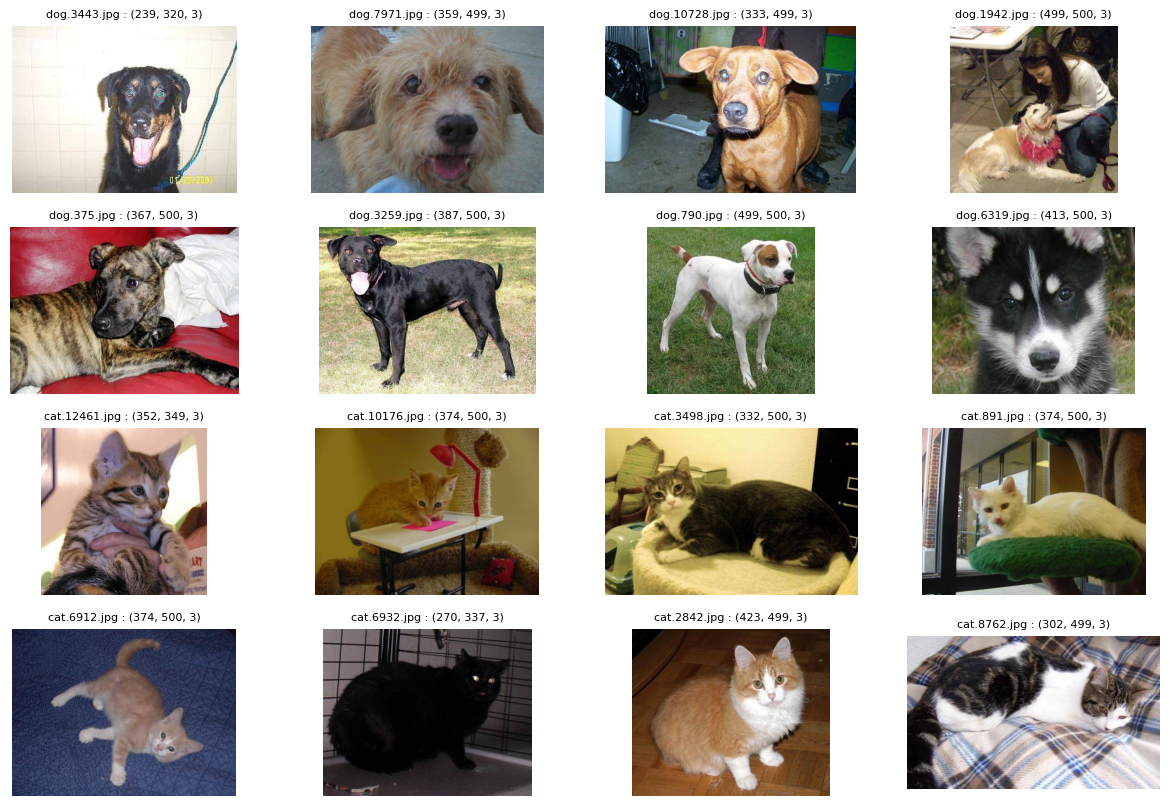

In [31]:
# Plot the Images in the Merged List
import matplotlib.image as mpimg

plt.figure(figsize=(15, 10))

for index, image_path in enumerate(merged_list):
    image_data = image_path.split("/")[-1] # Get the file name

    # Create a subplot of images using the no. of rows
    # and no. of columns
    sub_plot = plt.subplot(ROWS, COLS, index + 1)

    # Turn off axis
    sub_plot.axis("off")

    # Read the image into an array using matplotlib
    image = mpimg.imread(image_path)

    # Set the title for each image and fontsize
    title = f"{image_data} : {str(image.shape)}"
    sub_plot.set_title(title, fontsize=8)

    # Set the shape of the image as y-axis
    sub_plot.set_ylabel(str(image.shape))

    # Display the image as image
    plt.imshow(image, cmap="gray")
plt.show()

### Data Preprocessing
**Set the hyperparameters**

In [32]:
# Set the target size of each image to be (64 by 64)
# Set the batch size to 32 and class mode to binary for binary classification

TARGET_SIZE = (128, 128)
BATCH_SIZE = 256
CLASS_MODE = "binary"

In [33]:
# Preprocess the training data using the ImageDataGenerator() class

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [35]:
# Connecting the Image Augmentation tool to our dataset

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

Found 20000 images belonging to 2 classes.


In [36]:
# Preprocess the validation and test data

test_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [37]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

Found 5000 images belonging to 2 classes.


In [90]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False,
)

Found 12461 images belonging to 2 classes.


In [39]:
# Get the class indices
print(f"Class Indices: {train_generator.class_indices}")
print(f"Class Indices: {validation_generator.class_indices}")
print(f"Class Indices: {test_generator.class_indices}")

Class Indices: {'cats': 0, 'dogs': 1}
Class Indices: {'cats': 0, 'dogs': 1}
Class Indices: {'cats': 0, 'dogs': 1}


In [40]:
# Get the image shapes
print(f"Class Shape: {train_generator.image_shape}")
print(f"Class Shape: {validation_generator.image_shape}")
print(f"Class Shape: {test_generator.image_shape}")

Class Shape: (128, 128, 3)
Class Shape: (128, 128, 3)
Class Shape: (128, 128, 3)


In [41]:
# Initialise the CNN model using the Sequential class of the models module from the Keras Library

image_shape = train_generator.image_shape
image_shape

(128, 128, 3)

In [42]:
# Instantiate the Squential class

model = tf.keras.models.Sequential()

In [43]:
# Add an Input Layer

model.add(tf.keras.layers.Input(shape=image_shape))

In [44]:
# Add convolution layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))

I0000 00:00:1766581626.657044      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766581626.660967      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [45]:
# Add the ReLU activation layer
model.add(tf.keras.layers.ReLU())

In [46]:
# Add the Pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                   strides=(2, 2)))

In [47]:
# Add another convolutional, ReLU and Pooling layers

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), 
                                    strides=(2, 2)))

In [48]:
# Add another convolutional, ReLU and Pooling layers


model.add(tf.keras.layers.Conv2D(filters=64,
                                kernel_size=3,
                                activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=3))

In [49]:
# Observe the model architecture before flatten
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,648 (295.50 KB)

 Trainable params: 75,648 (295.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Now, add the flatten layer

model.add(tf.keras.layers.Flatten())

In [51]:
# Verify model architecture

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,648 (295.50 KB)

 Trainable params: 75,648 (295.50 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Now, add the fully-connected classification head
# Add a fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation="relu"))


In [53]:
# Verify model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       663,680 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739,328 (2.82 MB)

 Trainable params: 739,328 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Add more dense layers

model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [55]:
# Verify the final model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       663,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 747,649 (2.85 MB)

 Trainable params: 747,649 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Compile the ConvNet Model
# Use the Adam optimizer, the binary cross-entropy loss
# and monitor the accuracy metric

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()

In [57]:
# Compiling the CNN Model

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"]
             )

In [58]:
# Define callbacks
# Use EarlyStopping() callback to stop training if the validation loss doesn't improve after 5 training steps
# Use ModelCheckpoint to save the best model after each training step.
# Use ReduceLROnPlateau

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                 patience=5,
                                                 verbose=1,
                                                 restore_best_weights=True,
                                                )

model_checkpoing = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath="/kaggle/working/models_{val_loss:.3f}.keras",
    save_best_only=True,
    save_weights_only=False,
)


reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=5,
    factor=0.5,
    verbose=1
)

In [59]:
# Train the CNN Model

history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=100,
    callbacks=[early_stopping, model_checkpoing, reduce_learning_rate]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1766581636.466330     156 service.cc:152] XLA service 0x792800206e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766581636.466366     156 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766581636.466370     156 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766581636.941576     156 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-12-24 13:07:22.135978: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-24 13:07:22.358991: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1766581647.430910     156 device_co

63/79 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5170 - loss: 0.6903

2025-12-24 13:09:35.675521: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-24 13:09:35.828973: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


79/79 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5264 - loss: 0.6868 - val_accuracy: 0.6932 - val_loss: 0.5850 - learning_rate: 0.0010
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6839 - loss: 0.5894 - val_accuracy: 0.7350 - val_loss: 0.5307 - learning_rate: 0.0010
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7439 - loss: 0.5185 - val_accuracy: 0.7692 - val_loss: 0.4924 - learning_rate: 0.0010
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7597 - loss: 0.4923 - val_accuracy: 0.7766 - val_loss: 0.4833 - learning_rate: 0.0010
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7905 - loss: 0.4463 - val_accuracy: 0.7986 - val_loss: 0.4456 - learning_rate: 0.0010
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7988 - loss: 0.4284 - val_accuracy: 0.8134 - val_loss: 0.4094 - learning_rate: 0.0010
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8158 - loss: 0.4063 - val_accuracy

In [91]:
# Model evaluation

loss, accuracy = model.evaluate(test_generator)

print("Model Loss: ", loss)
print("Model Accuracy: ", accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8673 - loss: 0.3264
Model Loss:  0.28245314955711365
Model Accuracy:  0.8833962082862854


In [92]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

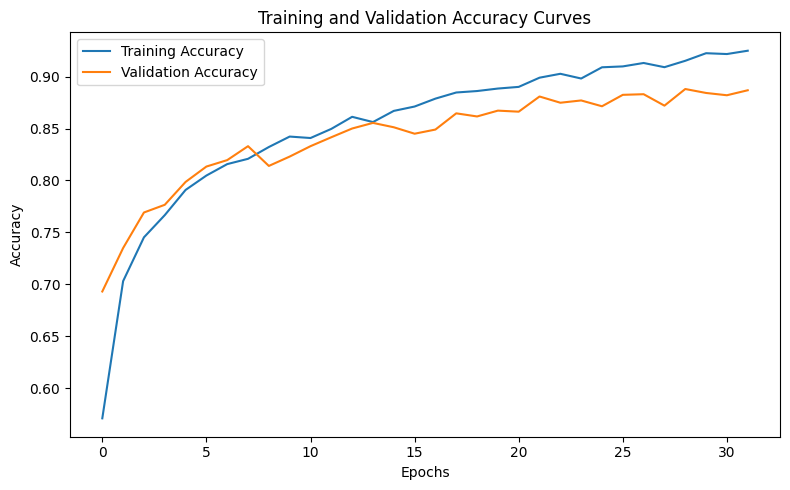

In [93]:
# Plot the graph to show the training and validation accuracy curves

plt.figure(figsize=(8, 5))
plt.plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

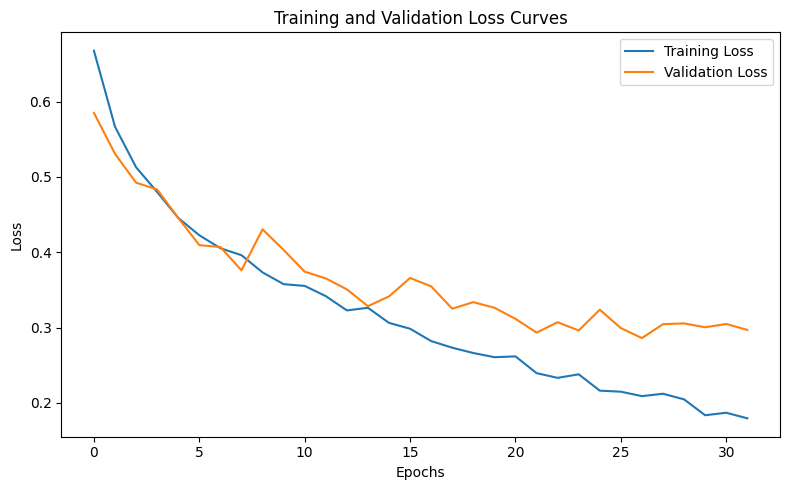

In [94]:
# Plot the graph to show the training and validation loss curves

plt.figure(figsize=(8, 5))
plt.plot(history.epoch, history.history["loss"], label="Training Loss")
plt.plot(history.epoch, history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

#### Reset the test_generator to start at image 1

In [ ]:
# Reset the generator to start at image #1
test_generator.reset()

In [95]:
# Get the confusion matrix and classification report
# First, make prediction on the reserved test data
# This returns a 2D array of prababilities (one for each class per image)

y_pred_proba = model.predict(test_generator)
y_pred_proba[:10]

49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step


array([[4.3751067e-03],
       [1.5618432e-01],
       [6.2664187e-01],
       [7.1385747e-01],
       [1.2020705e-05],
       [5.7528032e-05],
       [1.8850628e-01],
       [3.7130854e-01],
       [2.0227027e-03],
       [1.3027649e-01]], dtype=float32)

In [96]:
# Convert the probabilities into class indices
# Apply thresholdig: If probability > 0.5, it's class 1, else class 0
# .flatten() makes it a 1D array to match y_true

y_pred = (y_pred_proba >0.5).astype("int32").flatten()
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int32)

In [97]:
# Get the true class labels

y_true = test_generator.classes
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [98]:
# Get the class names
target_names = list(test_generator.class_indices.keys())
target_names

['cats', 'dogs']

In [99]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_true, y_pred, digits=4, target_names=target_names)
print("="*10, " Classification Report ", "="*10)
print(report)

==========  Classification Report  ==========
              precision    recall  f1-score   support

        cats     0.8991    0.8641    0.8813      6242
        dogs     0.8688    0.9027    0.8854      6219

    accuracy                         0.8834     12461
   macro avg     0.8840    0.8834    0.8834     12461
weighted avg     0.8840    0.8834    0.8834     12461



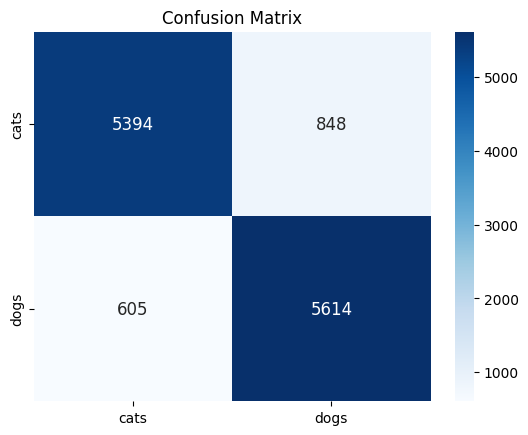

In [100]:
# Get the confusion matrix

cm = confusion_matrix(y_true, y_pred)


sns.heatmap(
    data=cm, annot=True, fmt="d", cmap="Blues", cbar=True,
    yticklabels=target_names, xticklabels=target_names,
    annot_kws={"fontsize": 12}
)
plt.title("Confusion Matrix")
plt.show()

In [101]:
# Other evaluation metrics

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


# Calculating the scores
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Printing the results
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.8834
Precision: 0.8688
Recall:    0.9027
F1 Score:  0.8854


In [102]:
# Get five cat images from the test cat images

test_cat_pix = [os.path.join(test_cat_dir, filename) for filename in test_cat_names]
test_cat_pix[:5]

['/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/cats/cat (232).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/cats/cat (4975).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/cats/cat (3960).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/cats/cat (4265).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/cats/cat (4218).jpg']

In [103]:
# Get five dog images from the test images

test_dog_pix = [os.path.join(test_dog_dir, filename) for filename in test_dog_names]
test_dog_pix[:5]

['/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (365).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (5758).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (3112).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (3527).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (4794).jpg']

In [104]:
merged_test_pix = test_dog_pix + test_cat_pix
merged_test_pix[:10]

['/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (365).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (5758).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (3112).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (3527).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (4794).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (4554).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (3012).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (1991).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (498).jpg',
 '/kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/dogs/dog (2956).jpg']

In [105]:
# Load a random image

rand_number = random.randint(1, len(merged_test_pix))
image_path = merged_test_pix[rand_number]
file_name = image_path.split("/")[-1].split(".")[0]

print(f"Selected image is of a {file_name}")

Selected image is of a cat (6219)


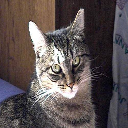

In [106]:
from keras.preprocessing.image import load_img, img_to_array

# Load selected image
img_dim = 128
test_file = load_img(image_path, target_size=(img_dim, img_dim))
test_file

In [107]:
# Image to array
test_img = img_to_array(test_file)

print("Image shape before expanding: ", test_img.shape)

print("Image array: \n", test_img)

Image shape before expanding:  (128, 128, 3)
Image array: 
 [[[ 92.  67.  62.]
  [ 87.  62.  57.]
  [ 94.  69.  64.]
  ...
  [ 88.  84. 109.]
  [ 72.  69.  96.]
  [ 74.  75.  95.]]

 [[ 93.  68.  61.]
  [ 95.  70.  63.]
  [ 90.  65.  58.]
  ...
  [ 75.  72.  91.]
  [ 74.  72.  93.]
  [ 82.  77.  99.]]

 [[ 89.  64.  57.]
  [ 92.  67.  60.]
  [ 91.  66.  59.]
  ...
  [ 74.  71.  88.]
  [ 79.  78.  94.]
  [101.  96. 118.]]

 ...

 [[ 64.  60.  51.]
  [ 64.  60.  51.]
  [ 78.  74.  65.]
  ...
  [ 54.  53.  67.]
  [ 55.  54.  68.]
  [ 56.  58.  71.]]

 [[ 56.  52.  43.]
  [ 95.  90.  87.]
  [ 85.  79.  79.]
  ...
  [ 61.  60.  66.]
  [ 63.  62.  67.]
  [ 62.  61.  67.]]

 [[ 99.  95.  86.]
  [ 86.  81.  78.]
  [ 92.  86.  86.]
  ...
  [ 55.  54.  62.]
  [ 52.  51.  57.]
  [ 59.  58.  66.]]]


In [108]:
# Expand dimensions

test_image = np.expand_dims(test_img, axis=0)
print("Image shape after expanding: ", test_image.shape)

print("\nImage Pixel alues: \n", test_image)

Image shape after expanding:  (1, 128, 128, 3)

Image Pixel alues: 
 [[[[ 92.  67.  62.]
   [ 87.  62.  57.]
   [ 94.  69.  64.]
   ...
   [ 88.  84. 109.]
   [ 72.  69.  96.]
   [ 74.  75.  95.]]

  [[ 93.  68.  61.]
   [ 95.  70.  63.]
   [ 90.  65.  58.]
   ...
   [ 75.  72.  91.]
   [ 74.  72.  93.]
   [ 82.  77.  99.]]

  [[ 89.  64.  57.]
   [ 92.  67.  60.]
   [ 91.  66.  59.]
   ...
   [ 74.  71.  88.]
   [ 79.  78.  94.]
   [101.  96. 118.]]

  ...

  [[ 64.  60.  51.]
   [ 64.  60.  51.]
   [ 78.  74.  65.]
   ...
   [ 54.  53.  67.]
   [ 55.  54.  68.]
   [ 56.  58.  71.]]

  [[ 56.  52.  43.]
   [ 95.  90.  87.]
   [ 85.  79.  79.]
   ...
   [ 61.  60.  66.]
   [ 63.  62.  67.]
   [ 62.  61.  67.]]

  [[ 99.  95.  86.]
   [ 86.  81.  78.]
   [ 92.  86.  86.]
   ...
   [ 55.  54.  62.]
   [ 52.  51.  57.]
   [ 59.  58.  66.]]]]


In [109]:
# Make predictions on the expanded arrays of image pixels

predictions = model.predict(test_image)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.]], dtype=float32)

In [110]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

Image is a Cat


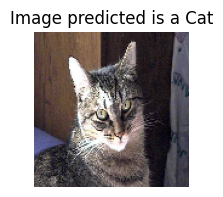

In [111]:
if predictions[0][0] == 1: 
    prediction = "Dog"
    print(f"Image is a {prediction}")
else:
    prediction = "Cat"
    print(f"Image is a {prediction}")


# Visualise the image predicted
plt.figure(figsize=(2,3))
plt.imshow(test_file)
plt.title(f"Image predicted is a {prediction}")
plt.axis("off")
plt.show()

In [112]:
# Putting everything together
# Make predictions on any of the images (cats or dogs)
# This should be the images the model has not seen before

# Create a function to import and resize an image so it can be used by our model
def predict_and_plot(model, path, img_dim=128):
    test_file = load_img(image_path, target_size=(img_dim, img_dim))
    test_img = img_to_array(test_file)
    test_image=np.expand_dims(test_img, axis=0)

    predictions = model.predict(test_image)
    print(f"Predictions: {int(predictions[0][0])}")
    if int(predictions[0][0]) == 1:
        print()
        prediction = 'Dog'
    
    else:
        prediction = 'Cat'

    plt.figure(figsize=(3,2))
    plt.imshow(test_file)
    plt.title(f"Prediction Result: {prediction}")
    plt.axis("off")

Selected image path: /kaggle/input/d/moazeldsokyx/dogs-vs-cats/dataset/test/cats/cat (4504).jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictions: 0


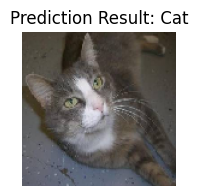

In [117]:
rand_number = random.randint(1, len(merged_test_pix))
image_path = merged_test_pix[rand_number]

print(f"Selected image path: {image_path}\n")
# Call the function to make predictions

predict_and_plot(model=model, path=image_path)